# Cultural Ecosystem Services: City of Los Angeles Parks
##### Project by: Ellie Troxell, Morgan Rogers, & Jacqueline Adams

## Background & Context

The ecosystem services framework is a bridging concept from the natural and social sciences fields that highlights nature’s function as value to human society. Ecosystem services as an approach focuses on the benefits that society receives from the environment across four categories: provisioning services, cultural services, regulating services, and supporting, or intermediate, services. Cultural services encompasses the physical, intellectual, and spiritual interactions with biota. 

In light of new methods available through the application of urban data science, ecosystem services research has begun to explore using social media data such as from photo sharing sites like Flickr. Social media has begun to quantify spatial patterns of cultural ecosystem service (CES) provisioning, allowing for a unique analysis of the ways in which spaces are providing CES and the distribution of those CES across a landscape. 

At the same time, there has been a national push to expand park access across urban and rural areas to provide these CES along with public health benefits. The Trust for Public Land has created a park score index of the 100 largest cities in the United States based on park acres, facilities and investment, and resident access to local parks. Los Angeles ranked 74th out of the 100 cities in 2018, but has since made progress  and is now ranked 49th ([KCET, 2018](https://www.kcet.org/neighborhood-data-for-social-change/los-angeles-is-short-on-parks-ranking-74th-out-of-100-cities); [The Trust for Public Land, 2020](https://www.tpl.org/city/los-angeles-california)). Goal 6 of the OurCounty sustainability plan for Los Angeles county, released in 2019, is to increase access to parks, beaches, public lands, and public spaces to create “respite, recreation, ecological discovery, and cultural activities” ([OurCounty, Accessed April 16, 2021](https://ourcountyla.lacounty.gov/goals/goal-6). The goal of this study is to evaluate current CES being provided by parks in Los Angeles, how this has changed over time, and the spatial distribution of these CES. The motivation of this study is to provide policy makers in the City of Los Angeles a baseline analysis of current CES in parks to use as a benchmark to measure their progress in expanding access to CES through parks.  

## Research Questions
In this project, we seek to answer the following two research questions: 
1) What CES do people obtain from parks in the city of Los Angeles?

2) How do CES differ by park in the city of Los Angeles?

## Study Area
The City of Los Angeles is approximately 468.7 square miles and home to 3,966,936 people with 644 parks. Los Angeles ranks 51 out of 100 in terms of overall access to parks and 56 out of 100 in median park size and percent area dedicated to parks. For context, 62 percent of Angelenos are within a 10 minute walk of a park and thirteen percent of Los Angeles’s city land is used for parks and recreation.

In our analysis, we sample and assess the CES of 12 parks: MacArthur Park, Woodley Park, Rio de Los Angeles, Runyon Canyon, Temescal Gateway, Heidelberg Park, Hancock Park, Franklin Canyon Park, Angels Gate, Coldwater Canyon, Chatsworth Park South, Cheviot Hills. 


# Notebook 1: MacArthur Park Test

Our process began with testing one park in order to outline, test, and prepare the steps to scale data processing, analysis, and visualization for all parks under consideration in the city of Los Angeles. This is to ensure that our code works efficiently while exploring the appropriate approach and debugging.  

This notebook is broken into three sections:
1. Inspect & Explore the Flickr API
2. Data Wrangling
3. Visualizing Cultural Ecosystem Services



## Inspect & Explore the Flickr API

We first made a request to the Flickr API using our API key and secret provided by Flickr, and store the response in the `flickr` object. Note that the Flickr API returns in XML format; therefore, we explicitly ask for JSON format. 

In [1]:
#Connect to Flicker API
import flickrapi
import json

api_key = u'356c3b8530e59f84095a0afc0da1414d'
api_secret = u'b51150d99cc64044'

#flickr = flickrapi.FlickrAPI(api_key, api_secret)
#for json format
flickr = flickrapi.FlickrAPI(api_key, api_secret, format='parsed-json')

Next, we explore what the 'flickr' object includes using our test park--MacArthur Park--as an example.

In [2]:
#Source: https://www.flickr.com/services/api/flickr.photos.search.html
#Bound the photos search to those only located within the city of Los Angeles

extras='geo,description,tags'
MacArthurPark = flickr.photos.search(tags='MacArthur Park', bbox = '-118.898278,33.704902,-118.161021,34.32848',
                                     method_name='flickr', per_page=500, extras=extras, format='parsed-json')
photos = MacArthurPark['photos']

from pprint import pprint
pprint(photos)

{'page': 1,
 'pages': 2,
 'perpage': 250,
 'photo': [{'accuracy': '16',
            'context': 0,
            'description': {'_content': 'Westlake / MacArthur Park metro '
                                        'station'},
            'farm': 66,
            'geo_is_contact': 0,
            'geo_is_family': 0,
            'geo_is_friend': 0,
            'geo_is_public': 1,
            'id': '49861807202',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'latitude': '34.055000',
            'longitude': '-118.274167',
            'owner': '22316914@N06',
            'place_id': '',
            'secret': 'ccec045e20',
            'server': '65535',
            'tags': 'losangeles ca california subway metro public tatyana '
                    'transit mass red tile escalator exit entrance stairs '
                    'reflection macarthurpark westlake '
                    'someoneleftmycakeoutintherain dark light square flaneur '
           

           {'accuracy': '16',
            'context': 0,
            'description': {'_content': 'Participating in CicLAvia (Heart of '
                                        'L.A.), where 5.75 miles of downtown '
                                        'was closed from traffic to allow open '
                                        'streets for bicyclists, pedestrians, '
                                        'skateboarders, skaters, etc., in Los '
                                        'Angeles, CA'},
            'farm': 6,
            'geo_is_contact': 0,
            'geo_is_family': 0,
            'geo_is_friend': 0,
            'geo_is_public': 1,
            'id': '30340562776',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'latitude': '34.057624',
            'longitude': '-118.279342',
            'owner': '25563261@N05',
            'place_id': 'YL1rrY5YULoVwr15CQ',
            'secret': '4b0e7bf555',
            'server': '5560

            'geo_is_family': 0,
            'geo_is_friend': 0,
            'geo_is_public': 1,
            'id': '49169463826',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'latitude': '34.057592',
            'longitude': '-118.278518',
            'owner': '44335492@N00',
            'place_id': '',
            'secret': '9b418245df',
            'server': '65535',
            'tags': 'la losangeles ca usa socal southerncalifornia heartofla '
                    'ciclavia lake westlake palmtree macarthurpark',
            'title': 'IMG_6775',
            'woeid': '8062690'},
           {'accuracy': '16',
            'context': 0,
            'description': {'_content': 'Riding in the Heart of L.A. CicLAvia, '
                                        'where 6 miles of streets were closed '
                                        'from traffic, from the Historic Core, '
                                        'Little Tokyo, the Arts Distr

                    'restaurant food westlake macarthurpark lainstitution '
                    'palmtrees interior',
            'title': '',
            'woeid': '92059074'},
           {'accuracy': '16',
            'context': 0,
            'description': {'_content': ''},
            'farm': 1,
            'geo_is_contact': 0,
            'geo_is_family': 0,
            'geo_is_friend': 0,
            'geo_is_public': 1,
            'id': '41526274172',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'latitude': '34.056319',
            'longitude': '-118.276681',
            'owner': '74877815@N05',
            'place_id': 'YL1rrY5YULoVwr15CQ',
            'secret': 'eaa0592244',
            'server': '937',
            'tags': 'langersdeli losangeles california ca la normlanger photo '
                    'restaurant food westlake macarthurpark lainstitution '
                    'palmtrees interior',
            'title': '',
        

            'server': '879',
            'tags': 'westlake macarthurpark lake architecture neighborhood '
                    'community palmtrees palms buildings grand fountain '
                    'losangeles california ca la',
            'title': '',
            'woeid': '92059074'},
           {'accuracy': '16',
            'context': 0,
            'description': {'_content': ''},
            'farm': 1,
            'geo_is_contact': 0,
            'geo_is_family': 0,
            'geo_is_friend': 0,
            'geo_is_public': 1,
            'id': '39758690640',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'latitude': '34.057177',
            'longitude': '-118.277450',
            'owner': '74877815@N05',
            'place_id': 'YL1rrY5YULoVwr15CQ',
            'secret': '1c12777d49',
            'server': '883',
            'tags': 'westlake macarthurpark lake architecture neighborhood '
                    'community palmtrees 

            'secret': '7751d6162f',
            'server': '8139',
            'tags': 'lacd1 macarthurpark macarthur park joe4cd1 '
                    'chaleconcedillo losangeles',
            'title': 'MacArthur Park scenes',
            'woeid': '92059074'},
           {'accuracy': '16',
            'context': 0,
            'description': {'_content': 'Dcim\\100gopro'},
            'farm': 8,
            'geo_is_contact': 0,
            'geo_is_family': 0,
            'geo_is_friend': 0,
            'geo_is_public': 1,
            'id': '29396617112',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'latitude': '34.060021',
            'longitude': '-118.278143',
            'owner': '45152500@N00',
            'place_id': 'YL1rrY5YULoVwr15CQ',
            'secret': '962f22a924',
            'server': '7788',
            'tags': 'lacd1 macarthurpark macarthur park joe4cd1 '
                    'chaleconcedillo losangeles',
            'ti

            'geo_is_friend': 0,
            'geo_is_public': 1,
            'id': '22296636475',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'latitude': '34.057472',
            'longitude': '-118.277406',
            'owner': '25563261@N05',
            'place_id': 'c9d0dwRTUb8v0hz88w',
            'secret': '5378dc9017',
            'server': '5729',
            'tags': 'park ca sky usa lake art fountain clouds losangeles '
                    'colorful balls westlake socal publicart '
                    'southerncalifornia dtla macarthurpark downtownlosangeles '
                    'portraitsofhope heartofla ciclavia',
            'title': 'IMG_3444',
            'woeid': '23511979'},
           {'accuracy': '16',
            'context': 0,
            'description': {'_content': 'At MacArthur Park viewing Portraits '
                                        'of Hope (where 3000 vinyl balls were '
                                      

                    'giovanniribisi seanpenn parkplazahotel bellflower '
                    'ryangosling emmastone robertpatrick anthonymackie '
                    'joshbrolin michaelpeña',
            'title': 'Gangster Squad',
            'woeid': '23511979'},
           {'accuracy': '16',
            'context': 0,
            'description': {'_content': 'Riding past MacArthur Park in '
                                        'CicLAvia, in which approximately 6.3 '
                                        'miles of Wilshire Boulevard was '
                                        'closed to traffic from Downtown to '
                                        'LACMA/Fairfax for 7 hours, for an '
                                        'estimated 150,000 bicyclists, '
                                        'walkers, skaters, skateboarders, etc. '
                                        '(modeled after ciclovia in Colombia, '
                                        'which began in Bogota

            'id': '8176418333',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'latitude': '34.059734',
            'longitude': '-118.278465',
            'owner': '23927487@N05',
            'place_id': '.8YMrEJTUb.n66xZqg',
            'secret': 'b935ce27f2',
            'server': '8206',
            'tags': 'losangeles location hollywood filming macarthurpark '
                    'petstore doncheadle kevindillon lisakudrow dogpound '
                    'emmaroberts jaketaustin',
            'title': 'Hotel for Dogs',
            'woeid': '23511980'},
           {'accuracy': '16',
            'context': 0,
            'description': {'_content': 'The 2009 family picture &quot;Hotel '
                                        'for Dogs&quot; was shot entirely in '
                                        'Los Angeles. As a request from my '
                                        'daughter, who actually works at a '
                       

In [3]:
# Note that there are 5 pages of results
print(len(photos))

5


The Flickr API returns a dictionary with a collection of keys and values. It looks like the key that we are interested in is `photo` which is a list denoted by [ ].

In [4]:
print(photos.keys())


dict_keys(['page', 'pages', 'perpage', 'total', 'photo'])


In [5]:
# We want to look at the photo key
print(photos['photo'])

[{'id': '49861807202', 'owner': '22316914@N06', 'secret': 'ccec045e20', 'server': '65535', 'farm': 66, 'title': 'Subway', 'ispublic': 1, 'isfriend': 0, 'isfamily': 0, 'description': {'_content': 'Westlake / MacArthur Park metro station'}, 'tags': 'losangeles ca california subway metro public tatyana transit mass red tile escalator exit entrance stairs reflection macarthurpark westlake someoneleftmycakeoutintherain dark light square flaneur flâneur lines', 'latitude': '34.055000', 'longitude': '-118.274167', 'accuracy': '16', 'context': 0, 'place_id': '', 'woeid': '8062690', 'geo_is_public': 1, 'geo_is_contact': 0, 'geo_is_friend': 0, 'geo_is_family': 0}, {'id': '49807593258', 'owner': '15139867@N05', 'secret': 'b60723272a', 'server': '65535', 'farm': 66, 'title': 'MacArthur Park, Downtown Los Angeles Skyline', 'ispublic': 1, 'isfriend': 0, 'isfamily': 0, 'description': {'_content': 'MV2P_0798'}, 'tags': 'downtownlosangeles losangelesskyline macarthurpark twilight dtla', 'latitude': '34

In [6]:
# Let's first just look at the first photo and the information associated with it
# It looks like we are interested in the 'tags' element of the list

item1 = photos['photo'][0]  
print(item1)

{'id': '49861807202', 'owner': '22316914@N06', 'secret': 'ccec045e20', 'server': '65535', 'farm': 66, 'title': 'Subway', 'ispublic': 1, 'isfriend': 0, 'isfamily': 0, 'description': {'_content': 'Westlake / MacArthur Park metro station'}, 'tags': 'losangeles ca california subway metro public tatyana transit mass red tile escalator exit entrance stairs reflection macarthurpark westlake someoneleftmycakeoutintherain dark light square flaneur flâneur lines', 'latitude': '34.055000', 'longitude': '-118.274167', 'accuracy': '16', 'context': 0, 'place_id': '', 'woeid': '8062690', 'geo_is_public': 1, 'geo_is_contact': 0, 'geo_is_friend': 0, 'geo_is_family': 0}


Now we understand the structure of each page. So we are ready to put all of the photos in a dataframe beginning with consolidating these separate steps into a function and saving the output to a `pandas` dataframe.

In [7]:
import pandas as pd

# Create a function that calls the API and identifies photos with the tag macarthurpark within the bounds of the City of Los Angeles
def get_photos(num_pages):
    
    photo_list = []
    
    for i in range(1, num_pages+1):
        extras = 'geo,description,tags'
        
        macarthur_park = ['macarthurpark']
        
        photos = flickr.photos.search(tags=macarthur_park, bbox = '-118.898278,33.704902,-118.161021,34.32848',
                                    method_name='flickr', page=i, per_page=100, extras=extras)
        
        photo_list.extend(photos['photos']['photo'])
    
    df = pd.DataFrame.from_dict(photo_list, orient='columns')
    
    return df

macarthur_photos = get_photos(5)

In [8]:
#Review the pandas dataframe 
macarthur_photos

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,description,...,latitude,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family
0,49861807202,22316914@N06,ccec045e20,65535,66,Subway,1,0,0,{'_content': 'Westlake / MacArthur Park metro ...,...,34.055000,-118.274167,16,0,,8062690,1,0,0,0
1,49807593258,15139867@N05,b60723272a,65535,66,"MacArthur Park, Downtown Los Angeles Skyline",1,0,0,{'_content': 'MV2P_0798'},...,34.059772,-118.280000,16,0,,8062690,1,0,0,0
2,49808147591,15139867@N05,868a4d0988,65535,66,"Westlake Theatre, Downtown Los Angeles Skyline",1,0,0,{'_content': 'MV2P_0795'},...,34.058600,-118.276012,16,0,,8062690,1,0,0,0
3,49807593143,15139867@N05,cca7a03aa5,65535,66,Downtown Los Angeles Skyline,1,0,0,{'_content': 'MV2P_0799'},...,34.057849,-118.275764,16,0,,8062690,1,0,0,0
4,49169692477,44335492@N00,9fa0cc498c,65535,66,IMG_6771,1,0,0,{'_content': 'Riding in the Heart of L.A. CicL...,...,34.057592,-118.278518,16,0,,8062690,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,2995824,24233013@N00,ec43eb2adc,1,1,Near Macarthur Park,1,0,0,{'_content': 'En route to Sally’s Beauty Suppl...,...,34.056432,-118.276721,16,0,7Z5HMmpTVr4VzDpD,2442047,1,0,0,0
471,2454014,44124383718@N01,8fb57ffba7,1,1,MacArthur Park,1,0,0,{'_content': 'LA HCM #100 view of Wilshire Blv...,...,34.058917,-118.276834,16,0,7Z5HMmpTVr4VzDpD,2442047,1,0,0,0
472,2454000,44124383718@N01,85983c03fb,3,1,Benched,1,0,0,{'_content': 'kinda squared oval'},...,34.059557,-118.277049,16,0,7Z5HMmpTVr4VzDpD,2442047,1,0,0,0
473,2453987,44124383718@N01,b4e286d9bf,3,1,MacArthur Park,1,0,0,{'_content': 'Looking for Richard Harris or Ji...,...,34.059059,-118.276126,16,0,7Z5HMmpTVr4VzDpD,2442047,1,0,0,0


We don't want to continuously call the Flicker API for two reasons: 1) Each call produces different results, and 2) Minimize the risk get kicked off of the API. Therefore, we save the returned MacArthur Park photos dataframe to a .csv to continue with analysis.

In [9]:
# Save to a .csv 
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

macarthur_photos.to_csv('macaruthur_photos.csv', index=False)  


In [10]:
import pandas as pd

#Read the .csv file and output as a pandas dataframe
macarthurDf = pd.read_csv('/Users/ellietroxell/Documents/GitHub - UP229.nosync/Final Project/LaParks_NLP/macaruthur_photos.csv')

# Confirm that the .csv was read properly
# We can confirm that there are the same number of rows and columns as the original dataframe
print(len(macarthurDf))
print(len(macarthurDf.columns))


475
21


## Data Wrangling

We are interested in the 'tags' associated with each photo and create a new dataframe only with the tags associated with each photo. The other columns in the dataframe are not necessary for our analysis.

The tags are similar to a hashtag with compound words. We test using the compound word splitter and compare the output with the tags. 

In [11]:
# Review the first 10 photos filtered by the 'tag' column
print(macarthurDf['tags'].head(10))

0    losangeles ca california subway metro public t...
1    downtownlosangeles losangelesskyline macarthur...
2    downtownlosangeles losangelesskyline macarthur...
3    downtownlosangeles losangelesskyline macarthur...
4    la losangeles ca usa socal southerncalifornia ...
5    la losangeles ca usa socal southerncalifornia ...
6    la losangeles ca usa socal southerncalifornia ...
7    shop store guatemala guatemalaimports westlake...
8    macarthurpark wilshireboulevard losangeles see...
9    wilshireboulevard losangeles seenfromthebus pa...
Name: tags, dtype: object


In [12]:
# Pull the tags into their own dataframe
# First, make sure the words are all lowercase for consistency

macarthurDf_tags = macarthurDf['tags'].str.lower() #This is a Series

# Review the first 10 photo tags in the Series
macarthurDf_tags.head(10)

0    losangeles ca california subway metro public t...
1    downtownlosangeles losangelesskyline macarthur...
2    downtownlosangeles losangelesskyline macarthur...
3    downtownlosangeles losangelesskyline macarthur...
4    la losangeles ca usa socal southerncalifornia ...
5    la losangeles ca usa socal southerncalifornia ...
6    la losangeles ca usa socal southerncalifornia ...
7    shop store guatemala guatemalaimports westlake...
8    macarthurpark wilshireboulevard losangeles see...
9    wilshireboulevard losangeles seenfromthebus pa...
Name: tags, dtype: object

Clean the tags

In [13]:
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
swords += ['macarthurpark', 'ca', 'losangeles', 'park', 'california', 'southerncalifornia', 'macarthurparkla',
                'usa', 'socal', 'lac', 'la', 'dtla', 'downtownlosangeleslosangeles', 'macarthurparkcity', 'unitedstates',
               'park','picounion','downtownlosangeles','hcm','sparkview','city','america','live','burns','westlake']

def clean_string(text):
    # remove whitespace
    #text = re.sub(r"\s+", " ", text)
    
    # remove punctuation
    text = re.sub(r"[^A-z\s]", "", text)
    
    cleaned_list_of_words = [word for word in word_tokenize(text.lower()) if word not in swords] #return a string or apply to all tags

    
    return cleaned_list_of_words


In [14]:
#Use the function to clean up the list of tags and return a new list of cleaned tags
cleaned_macarthur_tags = [clean_string(x) for x in macarthurDf_tags]
print(cleaned_macarthur_tags)

[['subway', 'metro', 'public', 'tatyana', 'transit', 'mass', 'red', 'tile', 'escalator', 'exit', 'entrance', 'stairs', 'reflection', 'someoneleftmycakeoutintherain', 'dark', 'light', 'square', 'flaneur', 'flneur', 'lines'], ['losangelesskyline', 'twilight'], ['losangelesskyline', 'twilight', 'westlaketheatre'], ['losangelesskyline', 'twilight'], ['heartofla', 'ciclavia', 'lake', 'palmtree'], ['heartofla', 'ciclavia', 'lake', 'palmtree'], ['heartofla', 'ciclavia', 'lake', 'palmtree'], ['shop', 'store', 'guatemala', 'guatemalaimports', 'ciclavia', 'heartofla'], ['wilshireboulevard', 'seenfromthebus', 'lake', 'lago'], ['wilshireboulevard', 'seenfromthebus', 'lake', 'lago'], ['wilshireboulevard', 'seenfromthebus', 'parque', 'lake', 'lago'], ['wilshireboulevard', 'seenfromthebus', 'lake', 'lago', 'parque'], ['lake', 'wilshireboulevard', 'seenfromthebus', 'lago', 'parque'], ['ciclavia', 'heartofla', 'lake', 'ducks', 'seagulls', 'palmtree', 'fountain', 'westlaketheatre', 'sign'], ['ciclavia',

In [15]:
macarthur_tags_list = [item for sublist in cleaned_macarthur_tags for item in sublist]
macarthur_tags_list

['subway',
 'metro',
 'public',
 'tatyana',
 'transit',
 'mass',
 'red',
 'tile',
 'escalator',
 'exit',
 'entrance',
 'stairs',
 'reflection',
 'someoneleftmycakeoutintherain',
 'dark',
 'light',
 'square',
 'flaneur',
 'flneur',
 'lines',
 'losangelesskyline',
 'twilight',
 'losangelesskyline',
 'twilight',
 'westlaketheatre',
 'losangelesskyline',
 'twilight',
 'heartofla',
 'ciclavia',
 'lake',
 'palmtree',
 'heartofla',
 'ciclavia',
 'lake',
 'palmtree',
 'heartofla',
 'ciclavia',
 'lake',
 'palmtree',
 'shop',
 'store',
 'guatemala',
 'guatemalaimports',
 'ciclavia',
 'heartofla',
 'wilshireboulevard',
 'seenfromthebus',
 'lake',
 'lago',
 'wilshireboulevard',
 'seenfromthebus',
 'lake',
 'lago',
 'wilshireboulevard',
 'seenfromthebus',
 'parque',
 'lake',
 'lago',
 'wilshireboulevard',
 'seenfromthebus',
 'lake',
 'lago',
 'parque',
 'lake',
 'wilshireboulevard',
 'seenfromthebus',
 'lago',
 'parque',
 'ciclavia',
 'heartofla',
 'lake',
 'ducks',
 'seagulls',
 'palmtree',
 'foun

We create a word cloud to initially visualize the tags associated with MacArthur Park.

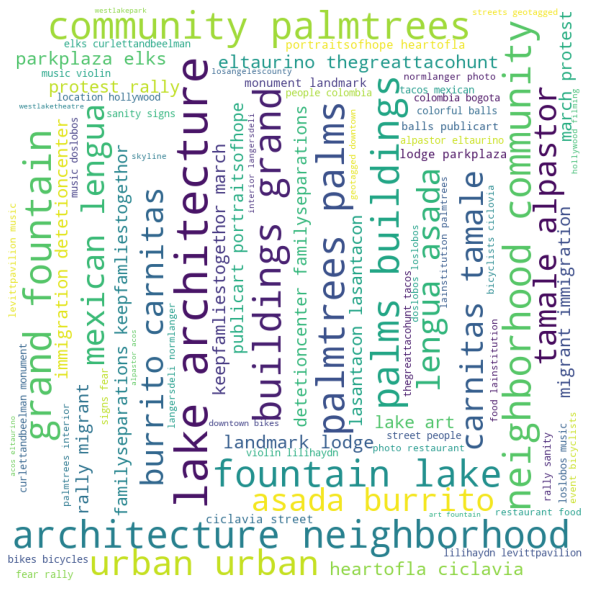

In [16]:
# Word Cloud
#Convert list (of lists) into a string in order to create wordcloud
listToStr = ' '.join([str(elem) for elem in macarthur_tags_list])

#Create a word cloud as an alternative method to analyze the topics and themes from the comments
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Source: https://www.geeksforgeeks.org/generating-word-cloud-python/
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(listToStr)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

#### OPTION 1: SPLIT COMPOUND TAGS

In [17]:
#Try to split compound words
# Source: https://pypi.org/project/compound-word-splitter/

#Must install brew first (mac OS) from https://brew.sh/: /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
# brew update
# brew install enchant

import enchant #pip install pyenchant
import splitter #pip install compound-word-splitter

#test
splitter.split('macarthurpark')


['mac', 'Arthur', 'park']

In [18]:
# If the word cannot be split into compounds pyenchant recognizes as words, the splitter returns an empty string
# Need to loop over the words in the list and run it through the splitter

def tags_split():
    tags_list = []
    for tag in macarthur_tags_list:
        tags_new = splitter.split(tag)
        tags_list.extend(tags_new)
    
    tags_clean_split_Df = pd.Series(tags_list)
    
    return tags_clean_split_Df

# create a list of all the words splitting on the spaces
macarthur_split_tags = tags_split()

In [19]:
# Conduct a basic word count of the tags
def countWords(wordlist):
    counts = {} # a dictionary to hold the counts
    for word in wordlist:
        lword = word.lower() # convert to lowercase
        if lword in counts:
            counts[lword] +=1
        else:
            # doesn't exist in the dictionary
            counts[lword] = 1

    # convert the dictionary to a dataframe
    # https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
    df = pd.DataFrame.from_dict(counts, orient='index', columns=['word_count'])

    # sort it by the word_count column
    df.sort_values('word_count', ascending=False, inplace=True)
    df.index.name = 'word'
    return df

# create a list of all the words, through splitting on the spaces
df_split = countWords(macarthur_split_tags)

In [20]:
df_split.head(25)

,word_count
word,
lake,112
ia,100
cl,78
palm,78
av,76
ci,76
art,69
trees,63
of,63


This process is not helpful for our analysis. It would require a separate cleaning process while the compound words provided helpful and useful results. We chose to keep the tags as compound words to move forward with analysis.

#### OPTION 2: COMPOUND TAGS

In [21]:
# Conduct a basic word count of the tags
def countWords(wordlist):
    counts = {} # a dictionary to hold the counts
    for word in wordlist:
        lword = word.lower() # convert to lowercase
        if lword in counts:
            counts[lword] +=1
        else:
            # doesn't exist in the dictionary
            counts[lword] = 1

    # convert the dictionary to a dataframe
    # https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
    df = pd.DataFrame.from_dict(counts, orient='index', columns=['word_count'])

    # sort it by the word_count column
    df.sort_values('word_count', ascending=False, inplace=True)
    df.index.name = 'word'
    return df

# create a list of all the words, through splitting on the spaces
df = countWords(macarthur_tags_list)

In [22]:
df.head(25)

,word_count
word,
lake,87
ciclavia,76
fountain,62
palmtrees,60
architecture,46
urban,46
rally,41
buildings,40
grand,38
